In [7]:
library(nnet)
wholeSet = read.csv("./merged.csv")
set.seed(100)
trainingSize = nrow(wholeSet) * .9
trainingSetIndices = sample(1:nrow(wholeSet), trainingSize)
testingSetIndices = setdiff(rownames(wholeSet),trainingSetIndices)
trainingSet = wholeSet[trainingSetIndices,]
testingSet = wholeSet[testingSetIndices,]
formula = set~iperf+sysbench+ycruncher+pgbench

In [9]:
str(wholeSet)

'data.frame':	1360 obs. of  6 variables:
 $ iperf    : num  1158 1186 1201 1156 1167 ...
 $ sysbench : num  8.46 8.45 8.45 8.46 8.45 ...
 $ ycruncher: num  7.2 7.19 7.2 7.2 7.21 ...
 $ pgbench  : num  52355 62181 62119 58885 58885 ...
 $ set      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ vm       : int  1 1 1 1 1 1 1 1 1 1 ...


In [8]:
multinomModel <- multinom(formula, data=trainingSet) # multinom Model
summary (multinomModel) # model summary

# weights:  96 (75 variable)
initial  value 3393.648596 
iter  10 value 3252.384842
iter  20 value 3019.690042
iter  30 value 2666.489735
iter  40 value 2361.364419
iter  50 value 2140.976103
iter  60 value 2017.575843
iter  70 value 1978.772384
iter  80 value 1961.680520
iter  90 value 1957.164611
iter 100 value 1954.546055
final  value 1954.546055 
stopped after 100 iterations


Call:
multinom(formula = formula, data = trainingSet)

Coefficients:
    (Intercept)        iperf  sysbench  ycruncher       pgbench
2    8.22701666 -0.001930987  77.01215 -121.47881  3.533351e-03
3   -1.74221660 -0.009328011 -14.47404   19.49891 -8.950045e-05
4    6.63566737 -0.002582957  12.32649  -39.68653  2.876278e-03
5    0.07852514 -0.002517874  -6.21674  -16.02220  2.744455e-03
6   -6.66695378 -0.010319904 -29.00062   23.08417  1.566020e-03
7   -7.67245950 -0.018931642 -37.49377   39.94986  9.264621e-04
8  -12.20007933 -0.025985093 -41.03601   40.29943  1.544181e-03
9  -12.21341488 -0.027384890 -38.74132   40.08812  1.292388e-03
10  -6.38146721 -0.030529008 -37.75554   40.20417  1.108524e-03
11  -2.89692430 -0.030449771 -37.95260   40.08560  1.094293e-03
12  10.06507353 -0.033495912 -41.34747   45.21261  7.788725e-04
13  -7.07036234 -0.035005462 -33.45291   44.50421  9.916689e-05
14 -12.57360384 -0.035634566 -30.67627   43.89585 -1.129290e-04
15   5.11847393 -0.036481750 -34.14

In [3]:
predicted_scores <- predict (multinomModel, testingSet, "probs")
predicted_scores

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
8,5.413014e-01,6.063373e-04,4.420917e-01,2.162064e-04,6.410051e-05,1.262101e-03,0.0025486929,5.871614e-05,0.0002542343,0.0004483259,0.0005566123,1.999089e-04,3.561210e-03,5.471527e-03,1.358887e-03,5.229563e-09
14,5.003754e-04,6.827787e-01,3.157608e-04,2.193165e-01,8.704177e-02,8.581505e-03,0.0006149714,2.673338e-04,0.0002626016,0.0001405096,0.0001627901,1.104275e-05,3.959671e-06,1.751906e-06,4.177965e-07,2.647863e-12
40,1.249066e-01,1.144160e-09,6.580582e-01,8.591576e-07,2.274750e-06,2.030669e-03,0.0225233086,5.057790e-04,0.0022444313,0.0042552267,0.0052808794,3.381785e-03,6.007684e-02,8.914419e-02,2.758838e-02,5.308692e-07
44,5.520869e-02,9.088018e-10,4.402458e-01,4.207614e-07,9.501621e-07,1.158010e-03,0.0202524768,6.385170e-04,0.0031731506,0.0073625136,0.0091039926,6.915840e-03,1.472677e-01,2.340111e-01,7.465951e-02,1.327579e-06
50,1.539596e-01,1.028313e-09,6.961861e-01,8.059242e-07,2.158138e-06,1.850463e-03,0.0186350095,3.528413e-04,0.0015593570,0.0028447121,0.0035408456,2.211567e-03,4.030740e-02,6.012842e-02,1.842027e-02,3.512866e-07
64,2.384181e-06,4.409987e-01,3.366377e-06,3.478498e-01,2.041472e-01,5.593473e-03,0.0002150967,5.765349e-04,0.0003293554,0.0001314767,0.0001458198,6.187927e-06,4.653023e-07,1.258929e-07,3.090600e-08,3.080638e-13
74,3.771331e-05,1.770081e-01,4.257773e-05,4.433846e-01,3.543078e-01,2.158215e-02,0.0009906889,1.216278e-03,0.0007739038,0.0003006334,0.0003371257,1.596600e-05,1.810818e-06,5.506608e-07,1.321095e-07,1.511771e-12
96,9.410119e-02,1.787422e-02,1.389053e-01,1.363946e-01,1.229302e-01,2.741307e-01,0.1049804238,1.943307e-02,0.0297357963,0.0230543478,0.0271200467,3.716735e-03,4.250323e-03,2.682690e-03,6.903539e-04,7.273800e-09
103,1.885697e-05,3.859081e-03,5.917732e-05,2.665519e-01,5.738585e-01,1.103888e-01,0.0084853133,1.854207e-02,0.0101348469,0.0037377328,0.0041293561,2.142904e-04,1.517032e-05,3.925531e-06,1.033974e-06,2.579999e-11
109,5.713839e-06,4.103674e-02,1.500690e-05,4.052226e-01,4.987585e-01,3.871063e-02,0.0022826784,7.007672e-03,0.0037868448,0.0014694340,0.0016207165,7.689652e-05,4.920617e-06,1.250393e-06,3.258121e-07,5.642265e-12


In [4]:
predicted_class <- predict (multinomModel, testingSet)
table(predicted_class, testingSet$set)

               
predicted_class  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
             1   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             2   0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0
             3   0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
             4   0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0
             5   0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0
             6   0  0  0  1  1  5  2  0  0  1  1  0  0  0  0  0
             7   0  0  0  0  0  3  1  1  2  1  2  1  0  0  0  0
             8   0  0  0  0  0  0  1  3  1  0  0  1  0  0  0  0
             9   0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0
             10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             11  0  0  0  0  0  0  1  0  4  5  3  3  3  1  0  0
             12  0  0  0  0  0  0  0  2  0  3  2  4  4  1  0  0
             13  0  0  0  0  0  0  0  0  0  1  2  1  2  1  8  3
             14  0  0  0  0  0  0  0  0  0  0  0  0  1  2  5  0
             15  0  0  0

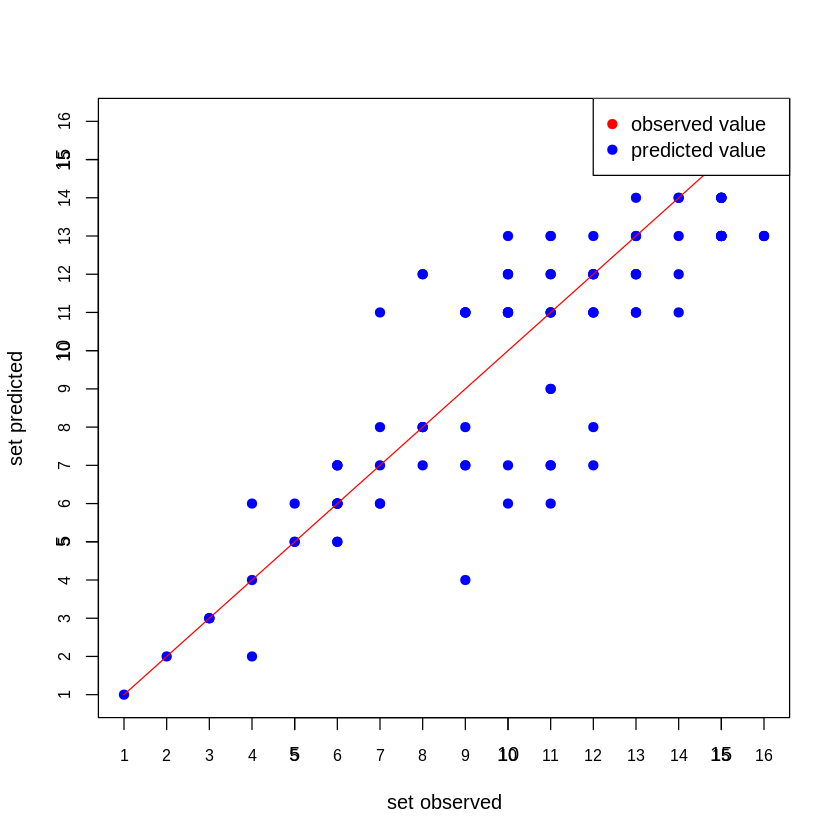

In [5]:
plot(x = testingSet$set , y = predicted_class,col="blue",pch=19,xlab="set observed",ylab="set predicted")
axis(1,1:16,1:16,cex.axis=0.8)
axis(2,1:16,1:16,cex.axis=0.8)
par(new=TRUE)
lines(x = range(1:16) , y = range(1:16),col="red")
legend("topright",legend=c("observed value","predicted value"),pch=19, col=c("red","blue"))

In [6]:
print("correct prediction")
mean(as.character(predicted_class) == as.character(testingSet$set))

[1] "correct prediction"


[1] 0.3676471